<a href="https://colab.research.google.com/github/kevinajordan/DS-Training/blob/master/15_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection with Keras and OpenCV

At first we will be using HaarCascade for face detection with OpenCV.

Second we will be using MTCNN in Python for Face Detection.


## Face Detection Using OpenCV

In [0]:
!pip install opencv-python

In [0]:
import cv2
print(cv2.__version__)

3.4.3


In [0]:
# Let's download our images we will use
!curl -O "https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test1.jpg"
!curl -O "https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test2.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  139k  100  139k    0     0  1179k      0 --:--:-- --:--:-- --:--:-- 1179k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  148k  100  148k    0     0  1689k      0 --:--:-- --:--:-- --:--:-- 1689k


In [0]:
!ls -la

total 1220
drwxr-xr-x 1 root root   4096 Aug 28 01:24 .
drwxr-xr-x 1 root root   4096 Aug 28 00:21 ..
drwxr-xr-x 1 root root   4096 Aug 26 16:14 .config
-rw-r--r-- 1 root root 930127 Aug 28 00:32 haarcascade_frontalface_default.xml
drwxr-xr-x 1 root root   4096 Aug 22 16:14 sample_data
-rw-r--r-- 1 root root 142525 Aug 28 01:29 test1.jpg
-rw-r--r-- 1 root root 152282 Aug 28 01:29 test2.jpg


### HaarCascade

To perform face detection we will use a pre-trained model that uses HaarCascade. This is a well known object detection algorithm that was first proposed in 2001.

I recommend reading this blog post on it:

http://www.willberger.org/cascade-haar-explained/

We need to download the HaarCascade pre-trained classifier file so we can use it with OpenCV.

In [0]:
!curl -O "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  908k  100  908k    0     0  3037k      0 --:--:-- --:--:-- --:--:-- 3037k


In [0]:
# import cv2 and related libraries
from cv2 import imread
#from cv2 import imshow
from google.colab.patches import cv2_imshow

# import a classifier that can do HaarCascade
from cv2 import _______
from cv2 import rectangle

plot photo with detected faces using opencv cascade classifier

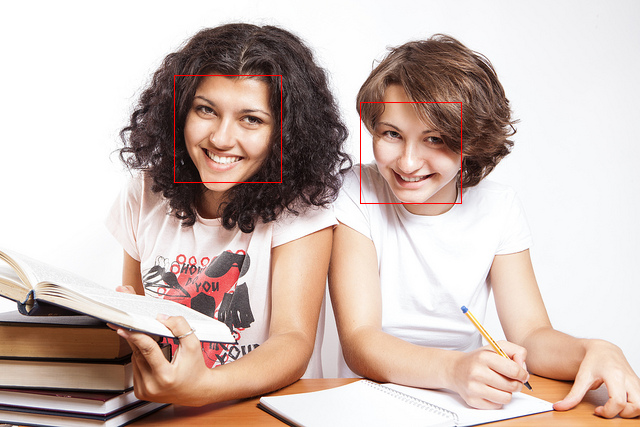

-1

In [0]:
# load the photograph
pixels = _____('test2.jpg')
# initiate the Haar Cascade classifier with the pre-trained model file
classifier = ______
# perform face detection
bboxes = classifier._______(pixels)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
cv2_imshow(pixels)


## Multi-task Cascade Convolutional Neural Network (MTCNN)

The MTCNN is popular because it achieved then state-of-the-art results on a range of benchmark datasets, and because it is capable of also recognizing other facial features such as eyes and mouth, called landmark detection.

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks.

![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/Pipeline-for-the-Multi-Task-Cascaded-Convolutional-Neural-Network.png)



There is a Python implementation of MTCNN [here](https://github.com/ipazc/mtcnn) that we'll be implementing.

In [0]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 3.1MB/s 
  Created wheel for mtcnn: filename=mtcnn-0.0.9-cp36-none-any.whl size=2257692 sha256=1f39c492320714ff22f3e7621b3119cc3c19d7b28e8becec21ddf58d39d25ce0
  Stored in directory: /root/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn


Re-download our images in case you needed to restart your runtime.

In [0]:
# Let's download our images we will use
!curl -O "https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test1.jpg"
!curl -O "https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/test2.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  139k  100  139k    0     0  1179k      0 --:--:-- --:--:-- --:--:-- 1179k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  148k  100  148k    0     0  1689k      0 --:--:-- --:--:-- --:--:-- 1689k


In [0]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.0.9


In [0]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

In [0]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image with matplotlib
	data = _______(filename)
	# plot the image with matplotlib
	________
	# get the context for drawing boxes. use matplotlib to get the current polar axes on the current figure
	ax = ______

	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']

		# create the rectangle shape using matplotlib
		rect = ____________
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
      
			# create and draw a circle
			circle = _____
			ax.add_patch(circle)
	# show the plot
	pyplot.show()

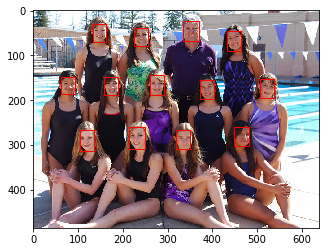

In [0]:
filename = 'test2.jpg'
# Read in the image with matplotlib this time.
pixels = _____(filename)

# create the detector, using default weights
detector = ______

# detect faces in the image
faces = detector._________
# display faces on the original image using the function you just created above
________

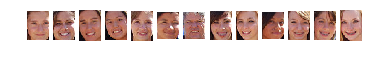

In [0]:
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()



In [0]:
filename = 'test2.jpg'
# load image using matplotlib
pixels = ______
# create the detector, using default weights
detector = ________
# detect faces in the image using the MTCNN library
faces = detector.__________
# display faces of the original image using the function created in the cell above
_________